## Diffusion MRI - the signal

In this notebook, we examine the raw diffusion-weighted MRI signal. We will load some data, and look at characteristics of the signal. First, let's import some of the elements we will need in the analysis:

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import urllib as url
import nibabel as nib
import os.path as op
from mpl_toolkits.mplot3d import Axes3D
import IPython.html.widgets as wdg
import IPython.display as display
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import dipy.core.geometry as geo

## ** Note ** 
For this example, we'll need to download the  Downloading example data. If you haven't yet, go to the [data-download](download-data.ipynb) notebook, and run that one first.

If you've already downloaded the data, you can go ahead and run the next cells. In the first cell, we define the b-vectors. These are 3D vectors, that tell us the directions in which the diffusion gradients were oriented in each of the 160 measurements that were conducted. This includes 10 vectors at the origin, `(0,0,0)`, for the non-diffusion weighted measurements that were conducted to acquire a baseline signal. The diffusion-weighted gradients are represented as unit-vectors in the directions of diffusion weighting in each of the 150 diffusion-weighting directions.

In [26]:
bvecs = np.loadtxt('./SUB1_b2000_1.bvecs')

In [27]:
bvecs.shape

(3, 160)

We can show the directions of measurements, by plotting the vectors in 3D space:

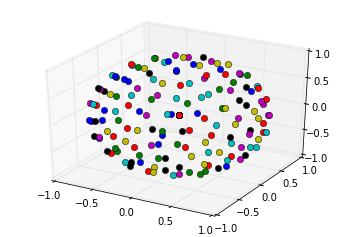

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plot3D expects something with length, so we convert into 1-item arrays:
for x,y,z in bvecs.T:
    ax.plot3D(np.ones(1) * x, np.ones(1) * y, np.ones(1) * z, 'o')

Next, we load the data. The data is stored in the standard 'nifti' format, and can be read using the [nibabel](http://nipy.org/nibabel) software library:

In [29]:
ni = nib.load('SUB1_b2000_1.nii.gz')
data = ni.get_data()

In [30]:
data.shape

(81, 106, 76, 160)

In [31]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


def plot_bvecs(elev=45, azim=45, x=40, y=50, z=35):
    this_vec = geo.sphere2cart(1, np.deg2rad(elev), np.deg2rad(azim))
    angles = np.arccos(np.dot(this_vec, bvecs[:, 10:]))
    closest = np.argmin(angles)
    n = closest + 10
    fig = plt.figure()
    #ax = fig.add_subplot(221, projection='3d')
    #a = Arrow3D([0, bvecs[0][n]],[0,bvecs[1][n]],[0,bvecs[2][n]], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
    ax = fig.add_subplot(221)
    a = ax.arrow(0,0, bvecs[1][n], bvecs[0][n], linewidth=4, width=0.005, color=[np.abs(bvecs[0][n]), np.abs(bvecs[1][n]), 
                                                                    np.abs(bvecs[2][n])])
    ax.set_xlim([-1.4, 1.4])
    ax.set_ylim([-1.4, 1.4])
    #ax.add_artist(a)
    ax.axis('off')
    #for set_lim in [ax.set_xlim, ax.set_ylim, ax.set_zlim]:
    #    set_lim([-1,1])
    ax = fig.add_subplot(222)
    ax.arrow(2,2,0,10, linewidth=4, width=0.1, color='r')
    ax.arrow(2,2,10,0, linewidth=4, width=0.1, color='g')
    ax.matshow(data[:, :, z, n], cmap=matplotlib.cm.bone)
    ax.axis('off')
    ax = fig.add_subplot(223)
    ax.axis('off')
    ax.arrow(2,2,0,10, linewidth=4, width=0.1, color='b')
    ax.arrow(2,2,10,0, linewidth=4, width=0.1, color='r')
    ax.matshow(np.rot90(data[:, y, :, n]), cmap=matplotlib.cm.bone)
    ax = fig.add_subplot(224)
    ax.axis('off')
    ax.arrow(2,2,0,10, linewidth=4, width=0.1, color='b')
    ax.arrow(2,2,10,0, linewidth=4, width=0.1, color='g')
    ax.matshow(np.rot90(data[x, :, :, n]), cmap=matplotlib.cm.bone)
    fig.set_size_inches(10, 10)
    plt.show()
    return fig
    

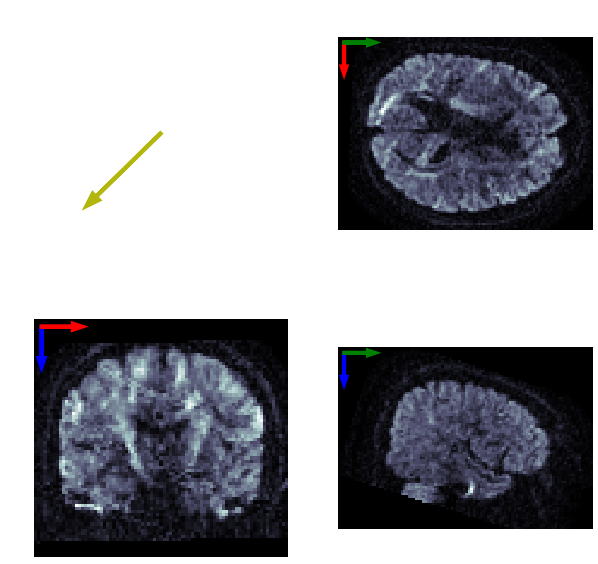

In [32]:
pb_widget = wdg.interactive(plot_bvecs, 
                            elev=wdg.FloatSliderWidget(min=-180, max=180, step=1.0),
                            azim=wdg.FloatSliderWidget(min=-180, max=180, step=1.0, value=90),
                            x=wdg.IntSliderWidget(min=1, max=data.shape[0], value=data.shape[0]//2),
                            y=wdg.IntSliderWidget(min=1, max=data.shape[1], value=data.shape[1]//2),
                            z=wdg.IntSliderWidget(min=1, max=data.shape[2], value=data.shape[2]//2)
                            )
display.display(pb_widget)